In [42]:
#configuration
import os
import torch # PyTorch is an open source machine learning (ML) framework based on the Python programming language and the Torch library.
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from matplotlib import style 
import seaborn as sns
from textwrap import wrap
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [43]:
import pandas as pd
file_path = '/home/roy/Documents/last year/cyber/data.csv'
df = pd.read_csv(file_path)


In [44]:
#determine whether a CUDA-enabled GPU is available and set the device accordingly.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [45]:
df

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad
...,...,...
420459,23.227.196.215/,bad
420460,apple-checker.org/,bad
420461,apple-iclods.org/,bad
420462,apple-uptoday.org/,bad


In [46]:
df['label'].value_counts()

label
good    344821
bad      75643
Name: count, dtype: int64

In [47]:
'''
in the first step we need to do Data Preprocessing //need to do more
'''
df.drop_duplicates(subset=['url'], keep='first', inplace=True)

In [48]:
df_0 = df[df['label'] == 'bad'].copy()
df_1 = df[df['label'] == 'good'].copy()
df_0= df_0[:50000]
df_1= df_1[:50000]
df = pd.concat([df_0,df_1], ignore_index=True)
df['label'] = df['label'].replace({'good': 1, 'bad': 0}) #for more complex work
df

/tmp/ipykernel_41480/1502467353.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace({'good': 1, 'bad': 0}) #for more complex work


,url,label
0,diaryofagameaddict.com,0
1,espdesign.com.au,0
2,iamagameaddict.com,0
3,kalantzis.net,0
4,slightlyoffcenter.net,0
...,...,...
99995,flv.freeones.com/a_babes/Angela_Summers/1405/,1
99996,flv.freeones.com/c_babes/Charley_Chase/138/,1
99997,flv.freeones.com/c_babes/Charley_Chase/930/,1
99998,flwebster.com/,1


/tmp/ipykernel_41480/3165559629.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette=custom_palette)
/home/roy/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/roy/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/tmp/ipykernel_41480/3165559629.py:5: UserWarning: set_ticklabels() should only be used with a 

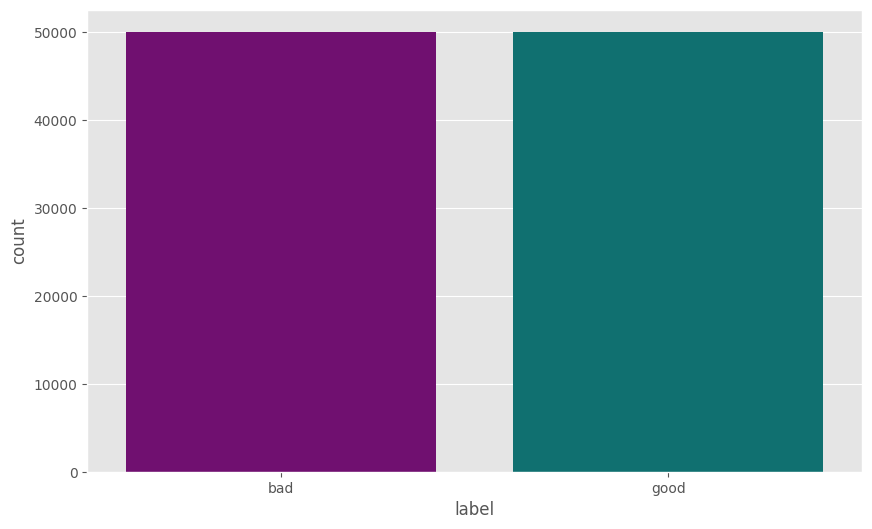

In [49]:
plt.figure(figsize=(10, 6))
class_names = ['bad', 'good']
custom_palette = ['Purple', 'teal']
sns.countplot(x='label', data=df, palette=custom_palette)
plt.gca().set_xticklabels(class_names)

plt.show()

In [50]:
'''
now we need to find a good fetures and add them to the data frame. according our reaserch we found out this features:
1. Domain Reputation: Check if the domain is known for hosting malicious content or if it's a reputable domain.
2. URL Length: Malicious URLs might be longer and contain more random characters.
3. Presence of Hyphens or Numbers in Domain: Often, malicious domains include hyphens or random numbers.
4. Use of IP Address instead of Domain Name: Malicious sites might use IP addresses instead of domain names.
5. Domain Age: Malicious domains are often recently registered.
6. HTTPS Usage: Malicious sites might not use HTTPS.
7. Redirects: Malicious sites might use multiple redirects to obfuscate the final destination.
8. Presence of Suspicious Keywords in URL: Check for keywords like 'phishing', 'malware', 'scam', etc.
9. Presence of Subdomains: Malicious sites might use subdomains to mimic legitimate sites.
10. WHOIS Information: Analyze WHOIS data to check for suspicious registrant information.
'''
# Function to check if a URL uses an IP address
def uses_ip_address(url):
    ip_pattern = re.compile(r'\b(?:\d{1,3}\.){3}\d{1,3}\b')
    return bool(ip_pattern.match(url))
    
df['uses_ip'] = df['url'].apply(uses_ip_address)
df['uses_ip'].value_counts()

uses_ip
False    98153
True      1847
Name: count, dtype: int64

In [51]:
df

,url,label,uses_ip
0,diaryofagameaddict.com,0,False
1,espdesign.com.au,0,False
2,iamagameaddict.com,0,False
3,kalantzis.net,0,False
4,slightlyoffcenter.net,0,False
...,...,...,...
99995,flv.freeones.com/a_babes/Angela_Summers/1405/,1,False
99996,flv.freeones.com/c_babes/Charley_Chase/138/,1,False
99997,flv.freeones.com/c_babes/Charley_Chase/930/,1,False
99998,flwebster.com/,1,False
